In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [18]:
# Loading the data
df = pd.read_csv("test_df.csv")
preds_df = pd.read_csv("predictions.csv")

df = df.merge(
    preds_df[["transaction_id", "score", "prediction"]],
    on="transaction_id",
    how="left"
)


In [19]:
tx_id = 82864

features = [
    "trans_date_trans_time",
    "is_fraud",
    "prediction", "score", 

    # Transaction features
    "amt",
    "hour",
    "is_night_tx",
    "dayofweek",
    "is_weekend",
    "age",
    "is_new_merchant",
    "card_time_since_prev_tx",
    "dist_from_prev_tx",
    "dist_from_home",
    "is_impossible_travel",
    "category_idx",
    "is_category_shift",

    # Card features
    "amt_zscore",
    "amt_vs_card_mean_ratio",
    "amt_minus_prev_max",
    "amt_minus_prev_min",
    "card_amt_mean",
    "card_amt_std",
    "tx_count_1h",
    "tx_count_24h",
    "amt_sum_1h",
    
    # Identity
    "gender_idx", "job_idx",
    "city_pop",

    # Mercahnt feature
    "merchant_avg_amt",
    "merchant_time_since_prev_tx",
    "amt_vs_merchant_avg_ratio",
]

df.loc[df["transaction_id"] == tx_id, features].iloc[0].to_frame("value")

,value
trans_date_trans_time,2020-07-20 06:55:07
is_fraud,0
prediction,1
score,10.361629
amt,724.16
hour,6
is_night_tx,0
dayofweek,0
is_weekend,0
age,57.620808


In [20]:
row_fp = df.loc[df["transaction_id"] == tx_id].iloc[0]
card_id = row_fp["card_id"]
fraud_time = row_fp["unix_trans_time"]

# Keep only past transactions
card_tx = (
    df[
        (df["card_id"] == card_id) &
        (df["unix_trans_time"] < fraud_time)
    ]
    .sort_values("unix_trans_time")[features]
)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
card_tx

,trans_date_trans_time,is_fraud,prediction,score,amt,hour,is_night_tx,dayofweek,is_weekend,age,is_new_merchant,card_time_since_prev_tx,dist_from_prev_tx,dist_from_home,is_impossible_travel,category_idx,is_category_shift,amt_zscore,amt_vs_card_mean_ratio,amt_minus_prev_max,amt_minus_prev_min,card_amt_mean,card_amt_std,tx_count_1h,tx_count_24h,amt_sum_1h,gender_idx,job_idx,city_pop,merchant_avg_amt,merchant_time_since_prev_tx,amt_vs_merchant_avg_ratio
192033,2020-06-21 21:46:11,0,0,0.693470,111.16,21,0,6,1,57.541410,1,3600.0,0.000000,66.292594,0,7,0,0.000000,2.165064,-190.14,110.08,51.342581,55.604225,1.0,4.0,16.93,0,267,3862,49.922000,4487.0,2.226674
192034,2020-06-22 06:22:04,0,0,0.691141,9.94,6,0,0,0,57.544148,1,30953.0,78.874269,83.744108,0,11,1,0.000000,0.089421,-101.22,-101.22,111.160000,0.000000,1.0,1.0,111.16,0,267,3862,96.570000,21913.0,0.102931
192035,2020-06-22 23:14:58,0,0,0.688860,66.24,23,0,0,0,57.544148,1,60774.0,148.738699,84.882809,0,6,1,0.079499,1.093972,-44.92,56.30,60.550000,71.573348,1.0,2.0,9.94,0,267,3862,60.999333,3299.0,1.085913
192036,2020-06-23 07:12:16,0,0,0.688871,75.70,7,0,1,0,57.546886,1,28638.0,57.892604,112.368387,0,4,1,0.261322,1.212234,-35.46,65.76,62.446667,50.716508,1.0,2.0,66.24,0,267,3862,111.572857,1620.0,0.678480
192037,2020-06-23 08:45:37,0,0,0.688861,9.59,8,0,1,0,57.546886,1,5601.0,96.878619,44.888546,0,9,1,-1.339399,0.145833,-101.57,-0.35,65.760000,41.936724,1.0,2.0,75.70,0,267,3862,35.338462,7158.0,0.271376
192038,2020-06-23 10:02:04,0,0,0.688884,1.19,10,0,1,0,57.546886,1,4587.0,93.504510,95.227114,0,9,0,-1.207813,0.021824,-109.97,-8.40,54.526000,44.159148,1.0,3.0,9.59,0,267,3862,50.946667,5153.0,0.023358
192039,2020-06-25 02:27:20,0,0,0.688853,78.18,2,1,3,0,57.552361,1,145516.0,120.663383,42.285174,0,2,1,0.721558,1.713096,-32.98,76.99,45.636667,45.101505,1.0,4.0,1.19,0,267,3862,60.837692,53356.0,1.285059
192040,2020-06-25 10:33:55,0,0,0.688799,53.23,10,0,3,0,57.552361,1,29195.0,61.928591,85.216200,0,1,1,0.068520,1.058551,-57.93,52.04,50.285714,42.969955,1.0,1.0,78.18,0,267,3862,70.963182,36809.0,0.750107
192041,2020-06-25 14:32:26,0,0,0.688734,88.16,14,0,3,0,57.552361,1,14311.0,30.305267,59.334735,0,7,1,0.942461,1.740444,-23.00,86.97,50.653750,39.796064,1.0,2.0,53.23,0,267,3862,45.656500,3349.0,1.930941
192042,2020-06-25 16:16:06,0,0,0.688772,15.91,16,0,3,0,57.552361,1,6220.0,110.296603,81.236188,0,5,1,-0.990883,0.290217,-95.25,14.72,54.821111,39.269110,1.0,3.0,88.16,0,267,3862,57.982857,66096.0,0.274391


In [21]:
# Total transactions
total_tx = card_tx.shape[0]

# Number of frauds
num_fraud = card_tx["is_fraud"].sum()

# Percentage
perc_fraud = (num_fraud / total_tx) * 100

print(f"Percentage of fraud transactions: {perc_fraud:.2f}%")


Percentage of fraud transactions: 0.00%


In [22]:
# Last transaction (fraud)
fp_tx = row_fp

# Compute historical stats
hist_stats = card_tx[[
    "amt", "amt_zscore", "amt_minus_prev_max", "amt_minus_prev_min", "card_time_since_prev_tx", "dist_from_prev_tx", "dist_from_home","merchant_avg_amt", "merchant_time_since_prev_tx"
]].describe().T

# Add the FP transaction value
hist_stats["fp_tx"] = [
    fp_tx["amt"],
    fp_tx["amt_zscore"],
    fp_tx["amt_minus_prev_max"],
    fp_tx["amt_minus_prev_min"],
    fp_tx["card_time_since_prev_tx"],
    fp_tx["dist_from_prev_tx"],
    fp_tx["dist_from_home"],
    fp_tx["merchant_avg_amt"],
    fp_tx["merchant_time_since_prev_tx"]
]

hist_stats

,count,mean,std,min,25%,50%,75%,max,fp_tx
amt,70.0,180.050857,1011.418381,1.190000,10.047500,62.350000,83.295000,8508.340000,724.160000
amt_zscore,70.0,2.264744,17.725793,-1.339399,-0.866775,0.088299,0.596643,148.080651,0.537966
amt_minus_prev_max,70.0,-134.214857,1419.568978,-8418.070000,-204.870000,-113.830000,-66.015000,8226.380000,-7784.180000
amt_minus_prev_min,70.0,176.796429,1011.843152,-101.220000,8.670000,58.690000,82.105000,8507.150000,722.970000
card_time_since_prev_tx,70.0,34764.200000,38429.226099,68.000000,7148.250000,18793.500000,60259.750000,150765.000000,22242.000000
dist_from_prev_tx,70.0,95.541857,45.620790,0.000000,60.761481,94.518035,118.985001,206.226208,20.706418
dist_from_home,70.0,71.718925,28.621390,14.354910,50.052585,75.838659,93.489263,123.120991,4.452640
merchant_avg_amt,70.0,72.217944,24.233290,35.338462,56.442223,63.922013,85.110242,126.466774,91.283452
merchant_time_since_prev_tx,70.0,25248.528571,33952.458353,157.000000,3408.250000,12850.500000,34265.500000,160207.000000,1780.000000


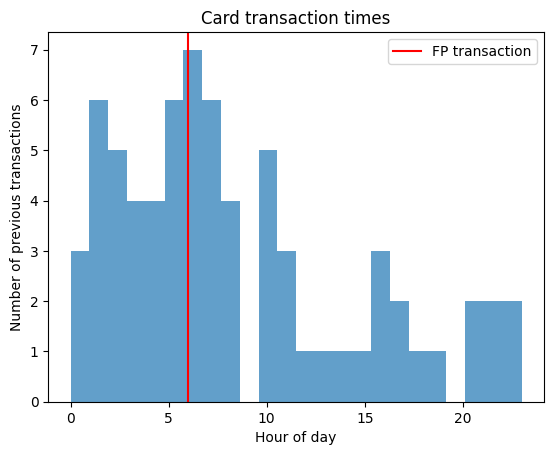

In [23]:
plt.hist(card_tx["hour"], bins=24, alpha=0.7)
plt.axvline(fp_tx["hour"], color="red", label="FP transaction")
plt.xlabel("Hour of day")
plt.ylabel("Number of previous transactions")
plt.title("Card transaction times")
plt.legend()
plt.show()


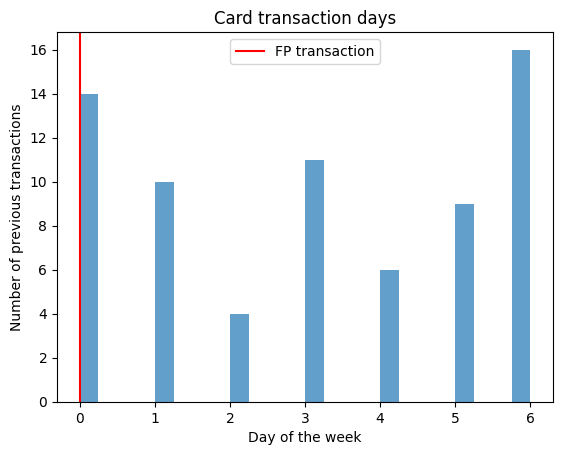

In [24]:
plt.hist(card_tx["dayofweek"], bins=24, alpha=0.7)
plt.axvline(fp_tx["dayofweek"], color="red", label="FP transaction")
plt.xlabel("Day of the week")
plt.ylabel("Number of previous transactions")
plt.title("Card transaction days")
plt.legend()
plt.show()
